<a href="https://www.kaggle.com/code/chinmaygonjari/zomato-eda-chinmay-gonjari?scriptVersionId=180204526" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


***Objectives:-*** 

**Data Cleaning**:

* Deleting redundant columns.
* Renaming the columns.
* Dropping duplicates.
* Cleaning individual columns.
* Remove the NaN values from the dataset
* Check for some more Transformations

**Data Visualization**:

* Restaurants delivering Online or not
* Restaurants allowing table booking or not
* Table booking Rate vs Rate
* Best Location
* Relation between Location and Rating
* Restaurant Type
* Gaussian Rest type and Rating
* Types of Services
* Relation between Type and Rating
* Cost of Restaurant
* No. of restaurants in a Location
* Restaurant type
* Most famous restaurant chains in Bengaluru


Reading the dataset(CSV):

In [2]:
df = pd.read_csv("/kaggle/input/zomato-eda/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=51717, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Droping the unnecessary columns:-**

In [7]:
df.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list', 'listed_in(city)', 'dish_liked'], axis = 1, inplace = True)
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


**Checking the null values by columns:-**

In [9]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [10]:
df.isnull().sum().sum()

8414

In [11]:
df.rename(columns = {'name': 'restaurants', 'book_table':'booking', 'listed_in(city)':'city', 'rate':'rating', 'approx_cost(for two people)':'cost', 'listed_in(type)':'types'}, inplace = True)
df.head()

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


**Droping NaN values:-**

In [12]:
len(df)

51717

In [13]:
df.dropna(inplace= True)

In [14]:
df.isnull().values.any()

False

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurants   43533 non-null  object
 1   online_order  43533 non-null  object
 2   booking       43533 non-null  object
 3   rating        43533 non-null  object
 4   votes         43533 non-null  int64 
 5   location      43533 non-null  object
 6   rest_type     43533 non-null  object
 7   cuisines      43533 non-null  object
 8   cost          43533 non-null  object
 9   types         43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


**Finding & removing the duplicate rows:-**

In [16]:
df[df.duplicated()].count().sum()

125750

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df[df.duplicated()].count().sum()

0

In [19]:
df.shape

(30958, 10)

**Cleaning individual columns:-**

column:-rating

In [20]:
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
df['rating'].replace("NEW|-",'0',regex=True).replace('/5','',regex=True).unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '0', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [22]:
df['rating']=df['rating'].replace("NEW|-",'0',regex=True).replace('/5','',regex=True).astype("float")
df['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [23]:
df['rating'].isnull().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  object 
 9   types         30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


**column : location**

In [25]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [26]:
df['location'].isnull().sum()

0

In [27]:
l = df['location'].value_counts(ascending = False)
l

location
BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64

In [28]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [29]:
df['cost'] = df['cost'].replace(',', '', regex = True).astype(int)
df['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

In [30]:
df['cost'].isnull().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  int64  
 9   types         30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


**column : booking**

In [32]:
df['booking'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df['booking'].isnull().sum()

0

**column:- online order**

In [34]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
df['online_order'].isnull().sum()

0

**column:- rest_type**

In [36]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [37]:
r = df['rest_type'].value_counts(ascending = False)
r.head(10)

rest_type
Quick Bites           10143
Casual Dining          7311
Cafe                   2495
Dessert Parlor         1357
Delivery               1117
Takeaway, Delivery      965
Casual Dining, Bar      940
Bakery                  547
Bar                     456
Beverage Shop           417
Name: count, dtype: int64

In [38]:
df['rest_type'].isnull().any()

False

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  int64  
 9   types         30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


**column : types**

In [40]:
df['types'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [41]:
t = df['types'].value_counts()
t

types
Delivery              14159
Dine-out              11354
Desserts               2117
Cafes                  1184
Drinks & nightlife      894
Buffet                  665
Pubs and bars           585
Name: count, dtype: int64

In [42]:
df['types'].isnull().sum()

0

**Column:- cuisines**

In [43]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [44]:
c = df['cuisines'].value_counts()
c

cuisines
North Indian                                                  1602
North Indian, Chinese                                         1401
South Indian                                                   902
Bakery, Desserts                                               471
Biryani                                                        429
                                                              ... 
Bakery, Fast Food, Burger, Rolls, Beverages                      1
Fast Food, Kerala, Mangalorean, Seafood, South Indian            1
Pizza, American                                                  1
North Indian, South Indian, Chinese, Desserts, Street Food       1
North Indian, Chinese, Arabian, Momos                            1
Name: count, Length: 2487, dtype: int64

**Column: restaurants**

In [45]:
df.groupby('restaurants').count().head()

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
restaurants,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,2,2,2,2,2,2,2,2,2


In [46]:
df['restaurants']=df['restaurants'].str.replace('[Ãx][^A-Za-z]+','',regex=True)
df.groupby('restaurants').count().head()

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
restaurants,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2
100C,2,2,2,2,2,2,2,2,2


**Checking null values (After cleaning individual columns):**

In [47]:
df.isnull().sum()

restaurants     0
online_order    0
booking         0
rating          0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
types           0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  int64  
 9   types         30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


In [49]:
df.shape

(30958, 10)

In [50]:
df.to_csv('./clean_zomato.csv')

***Data Visualization:***

*** Restaurants delivering Online or not**

In [51]:
# Restaurant Type

type1 = df['rest_type'].value_counts().head()
type1.to_frame()

,count
rest_type,
Quick Bites,10143
Casual Dining,7311
Cafe,2495
Dessert Parlor,1357
Delivery,1117


In [52]:
import plotly.express as px
fig=px.bar(x=type1.index,
           y=type1,
           color=type1.index 
           ,title='Restaurant type',labels={'x':'Restaurant', 'y':'Count of Restaurant'}
          )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


* We can see in this graph the count of restaurnat types & from this, the top 3 restaurant types are as follows:-

1. Quick Bites
2. Casual Dining
3. cafe

In [53]:
delivering_or_not = df['online_order'].value_counts()
delivering_or_not

online_order
Yes    19818
No     11140
Name: count, dtype: int64

In [54]:
fig = px.pie(delivering_or_not,
             title = 'Delivering Or Not',
             values = delivering_or_not,
             names = delivering_or_not.index)
fig.show()

* We have plotted countplot here to check whether the restaurants are delivering online or not & from the plot we can say that-
1. 64% restaurants deliver online
2. 36% restaurants do not deliver online

**Restaurants allowing table booking or not**

In [55]:
Table_booking = df['booking'].value_counts()
Table_booking

booking
No     25572
Yes     5386
Name: count, dtype: int64

In [56]:
fig = px.pie(Table_booking,
             title = 'Table_Booking_Acceptance',
             values = Table_booking,
             names = Table_booking.index
             )
fig.show()

* We have plotted countplot here to check whether the restaurants are accepting table booking or not & from the plot we can say that-
1. 17% restaurants accepts the table booking
2. 83% restaurants do not accept the table booking

**Table booking Rate vs Rating**

In [57]:
fig = px.box(df,
             x = 'booking',
             y = 'rating',
             color = 'booking'
            )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Here we can see that restaurants which offer table booking have higher ratings than those which do not.

**Online_Order vs Rating**

In [58]:
fig = px.violin(df,
                 x = 'online_order',
                 y = 'rating',
                 color = 'online_order',
                 box = True,
                 points = 'outliers')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Average overall rating of the restaurants providing online orders is higher.

**Best Location**

In [59]:
df['location'].value_counts()

location
BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64

In [60]:
best_location = df.groupby('location')['votes'].sum()
best_location = best_location.nlargest(5).sort_values(ascending = True)
best_location

location
JP Nagar                  479180
Church Street             555228
Koramangala 4th Block     591240
Indiranagar              1129994
Koramangala 5th Block    1984132
Name: votes, dtype: int64

In [61]:
fig = px.bar(x = best_location,
             y = best_location.index,
             title = 'Best Location by Votes',
             color = best_location.index, 
             labels = {'x':'Votes', 'y':'Location'}
             )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Here, we can deduct that '**Koramangala 5th Block**' is the **best location** to have the restaurant based on customer votes followed by Indiranagar, Koramangala 4th Block, Church Street & JP Nagar

**Relation between Location and Rating**

In [62]:
best_loc_rating = df.groupby('location')['rating'].sum()
best_loc_rating = best_loc_rating.nlargest(5).sort_values(ascending = True)
best_loc_rating

location
HSR                      5490.4
Whitefield               5576.6
Indiranagar              6110.9
Koramangala 5th Block    6364.2
BTM                      7610.6
Name: rating, dtype: float64

In [63]:
fig = px.bar(y = best_loc_rating.index,
             x = best_loc_rating,
             color = best_loc_rating.index,
             title = 'Best Location by Rating',
             labels = {'x':'Rating', 'y':'Location'})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Here, we can deduct that **BTM** is the **best location** to have the restaurant based on customer **Rating** followed by  Koramangala 5th Block,Indiranagar, Whitefield & HSR Layout

**Restaurant Type**

In [64]:
Rest_type = df['rest_type'].value_counts().head(10)
Rest_type

rest_type
Quick Bites           10143
Casual Dining          7311
Cafe                   2495
Dessert Parlor         1357
Delivery               1117
Takeaway, Delivery      965
Casual Dining, Bar      940
Bakery                  547
Bar                     456
Beverage Shop           417
Name: count, dtype: int64

In [65]:
df['rest_type'].nunique()

87

In [66]:
fig = px.bar(y = Rest_type.index,
             x = Rest_type,
             color = Rest_type.index,
             title = 'Restaurant Types',
             labels = {'x':'Count', 'y':'Restaurant Types'})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Restaurant in **Quick Bites** category has **highest numbers**, followed by Casual dining & cafe

**Gaussian Rest type and Rating**

In [67]:
Rest_type_rating = df.groupby('rest_type')['rating'].mean()
Rest_type_rating = Rest_type_rating.nlargest(10).sort_values(ascending = False)
Rest_type_rating

rest_type
Pub, Cafe                      4.657500
Bar, Pub                       4.600000
Microbrewery, Bar              4.446154
Microbrewery, Pub              4.438095
Casual Dining, Irani Cafee     4.406667
Cafe, Lounge                   4.400000
Fine Dining, Lounge            4.400000
Casual Dining, Microbrewery    4.336170
Fine Dining, Microbrewery      4.300000
Pub, Microbrewery              4.279730
Name: rating, dtype: float64

In [68]:
fig = px.bar(y = Rest_type_rating,
             x = Rest_type_rating.index,
             color = Rest_type_rating.index,
             title = 'Restaurant Type by Rating',
             labels = {'x':'Restaurant Type', 'y':'Rating'})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Types of Services**

In [69]:
df['types'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [70]:
Types = df['types'].value_counts()

In [71]:
fig = px.bar(x = Types.index,
             y = Types,
             color = Types.index,
             title='Service Type',labels={'x':'Service','y':'Count'}
             )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Here we can deduct that restaurants with **'Delivery'** & **'Dine-out'** services are highest in numbers compared to other types

In [72]:
fig = px.pie(Types,
             values = Types,
             names = Types.index,
             title='Service Type'
             )
fig.show()

1. Share of restaurants with **Delivery** services = **46%**
2. Share of restaurants with **Dine-out** services = **37%**

Together these two services forms over 83% of service types

**Relation between Type and Rating**

In [73]:
Best_Type_Rating = df.groupby('types')['rating'].mean()
Best_Type_Rating = Best_Type_Rating.sort_values(ascending = False)
Best_Type_Rating

types
Drinks & nightlife    3.994855
Buffet                3.968872
Pubs and bars         3.931966
Cafes                 3.751520
Desserts              3.638592
Dine-out              3.545922
Delivery              3.511420
Name: rating, dtype: float64

In [74]:
fig = px.bar(x = Best_Type_Rating,
             y = Best_Type_Rating.index,
             title = 'Best Services by Ratings',
             color = Best_Type_Rating.index, 
             labels = {'x':'Ratings', 'y':'Services'}
             )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Cost of Restaurant**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  int64  
 9   types         30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


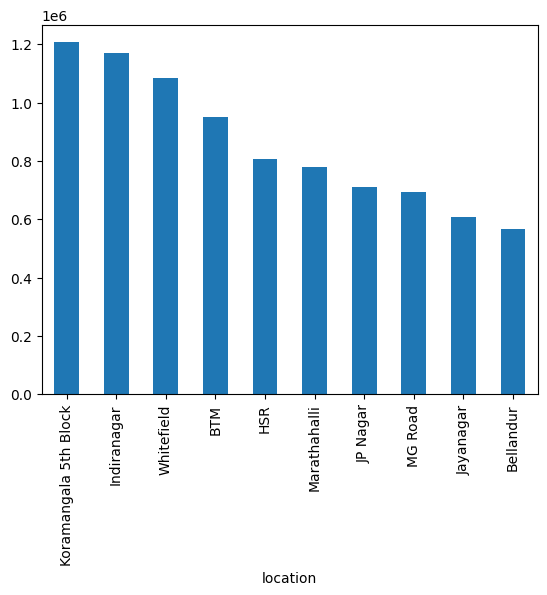

In [76]:
cost_loc = df.groupby('location')['cost'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



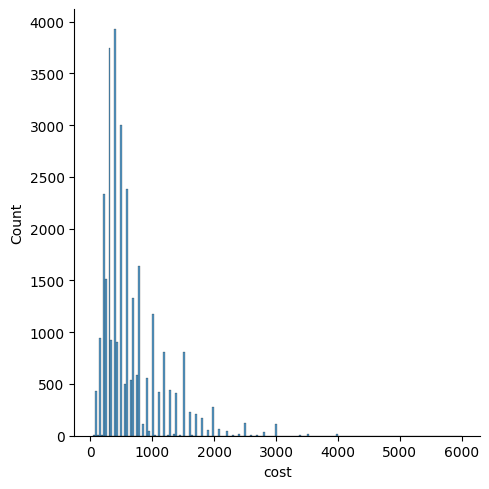

In [77]:
sns.displot(df['cost'])

In [78]:
fig = px.histogram(df['cost'], nbins = 100)
fig.show()

Here we can see that the cost for most of the restaurants fall below 1000 Rs.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



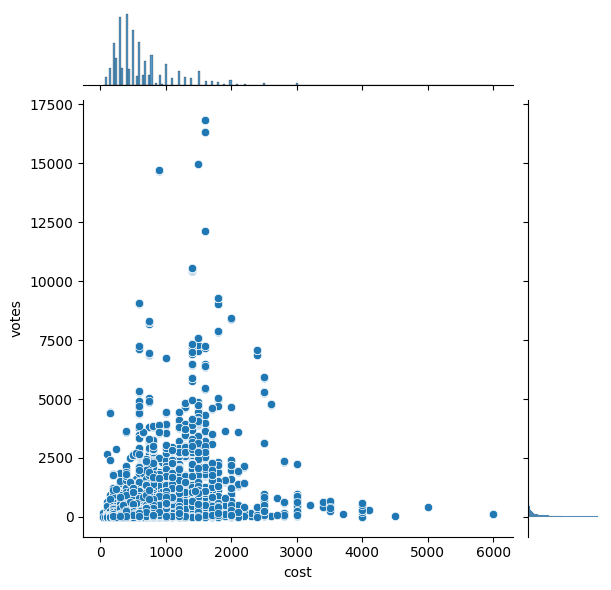

In [79]:
sns.jointplot(x='cost', y='votes', data=df, kind='scatter')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



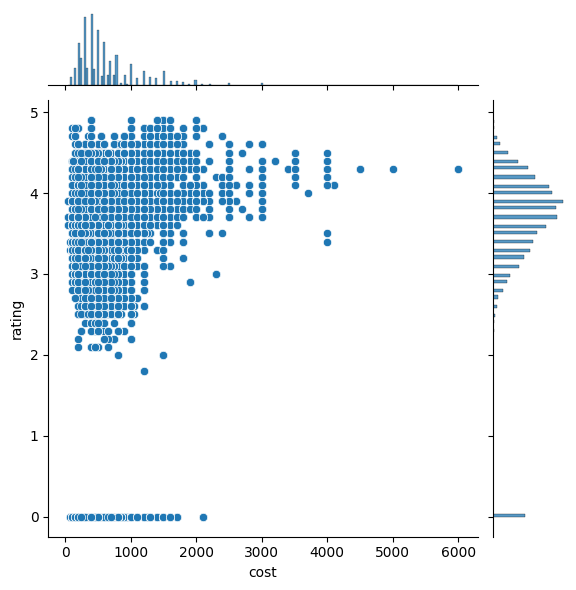

In [80]:
sns.jointplot(x='cost', y='rating', data=df, kind='scatter')

In [81]:
fig = px.scatter(df, x = 'cost', y = 'rating', color = 'online_order')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**No. of restaurants in a Location**

In [82]:
rest_loc = df.groupby('restaurants')['location'].value_counts(ascending = False)
rest_loc

restaurants                                   location             
#FeelTheROLL                                  Bellandur                2
#L-81 Cafe                                    HSR                      4
#refuel                                       Bannerghatta Road        3
1000 B.C                                      Koramangala 5th Block    2
100C                                          BTM                      2
                                                                      ..
iFruit Live Ice Creams                        Koramangala 1st Block    2
iSpice Resto Cafe                             Indiranagar              7
nu.tree                                       Whitefield               4
                                              Sarjapur Road            3
re:cess - Hilton Bangalore Embassy GolfLinks  Domlur                   2
Name: count, Length: 9848, dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rating        30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  int64  
 9   types         30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


In [84]:
rest_count = df['restaurants'].value_counts().head(10)
rest_count

restaurants
Cafe Coffee Day        82
Onesta                 81
Empire Restaurant      68
Kanti Sweets           60
Just Bake              56
Pizza Hut              55
KFC                    54
Domino's Pizza         54
Five Star Chicken      54
Smally's Resto Cafe    53
Name: count, dtype: int64

In [85]:
loc_count= df['location'].value_counts().head(10)
loc_count

location
BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
Marathahalli             1415
JP Nagar                 1221
Jayanagar                1154
Bellandur                1001
Electronic City           937
Name: count, dtype: int64

In [86]:
fig = px.bar(x = rest_count,
             y = loc_count.index,
             color = loc_count.index,
             title = 'No. of restaurants in a location',
             labels = {'x':'Resaturant Count', 'y':'Location'})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Most famous restaurant chains in Bengaluru**

**Famous Rest Chain**

In [87]:
FRC = df.groupby('restaurants')[['votes', 'rating']].agg('mean').sort_values(by = ['rating', 'votes'], ascending = False).head(10)
FRC

,votes,rating
restaurants,,
Byg Brewski Brewing Company,16588.500000,4.900000
Asia Kitchen By Mainland China,2224.894737,4.900000
SantSpa Cuisine,246.000000,4.900000
Punjab Grill,1380.000000,4.871429
Belgian Waffle Factory,957.190476,4.852381
Flechazo,4992.666667,4.800000
The Pizza Bakery,1753.833333,4.800000
O.G. Variar & Sons,1158.500000,4.800000
AB's - Absolute Barbecues,4445.222222,4.783333


**By Votes**

In [88]:
fig = px.bar(y = FRC['votes'],
             x = FRC.index,
             title = 'Most Famous Restaurant by Votes',
             color = FRC.index,
             labels = {'x':'Restaurants', 'y':'Votes'})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Here we can deduce that '**Byg Brewski Brewing Company**'  is the most famous rest. chain in Bangalore by Votes

**By Rating**

In [89]:
fig = px.bar(y = FRC['rating'],
             x = FRC.index,
             color = FRC.index,
             title = 'Most Famous Restaurant by Rating',
             labels = {'x':'Restaurants', 'y':'Votes'})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Here we can deduce that '**Byg Brewski Brewing Company**'  is the most famous rest. chain in Bangalore by Rating